In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dailyReturns = np.load("dailyReturns.npy")

In [3]:
dailyReturns

array([-0.01674989, -0.00641757,  0.02217649, ..., -0.01173924,
       -0.01557462,  0.00150474])

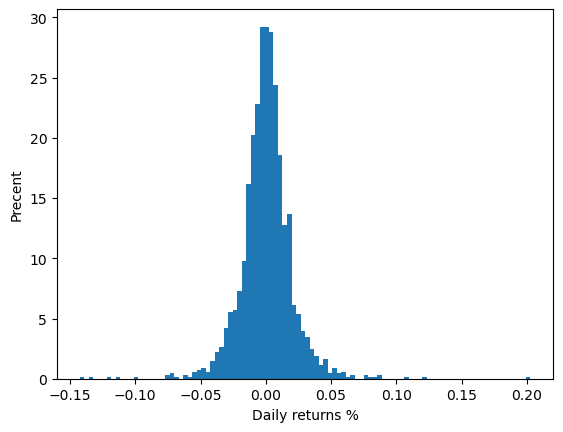

<Figure size 640x480 with 0 Axes>

In [7]:
plt.hist(dailyReturns, bins=100, density=True)
plt.xlabel("Daily returns %")
plt.ylabel("Precent")
plt.show()
plt.savefig("DailyReturnsHistogramm.png")

In [40]:
from datetime import datetime, timedelta
import numpy as np
import holidays

# Starting date
start_date = datetime(2015, 1, 2)

# Define the list of holidays (you can customize it according to your needs)
us_holidays = holidays.US()

# Define a function to check if a given date is a business day (Monday to Friday) and not a holiday
def is_trading_day(date):
    return date.weekday() < 5 and date not in us_holidays

# Generate the list of trading days
trading_day_list = []
current_date = start_date
while len(trading_day_list) < 1991:
    if is_trading_day(current_date):
        trading_day_list.append(current_date)
    current_date += timedelta(days=1)

# Convert dates to string format
trading_day_list_str = [date.strftime('%Y-%m-%d') for date in trading_day_list]

# Printing the list of trading days
print(trading_day_list_str)


['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13', '2015-01-14', '2015-01-15', '2015-01-16', '2015-01-20', '2015-01-21', '2015-01-22', '2015-01-23', '2015-01-26', '2015-01-27', '2015-01-28', '2015-01-29', '2015-01-30', '2015-02-02', '2015-02-03', '2015-02-04', '2015-02-05', '2015-02-06', '2015-02-09', '2015-02-10', '2015-02-11', '2015-02-12', '2015-02-13', '2015-02-17', '2015-02-18', '2015-02-19', '2015-02-20', '2015-02-23', '2015-02-24', '2015-02-25', '2015-02-26', '2015-02-27', '2015-03-02', '2015-03-03', '2015-03-04', '2015-03-05', '2015-03-06', '2015-03-09', '2015-03-10', '2015-03-11', '2015-03-12', '2015-03-13', '2015-03-16', '2015-03-17', '2015-03-18', '2015-03-19', '2015-03-20', '2015-03-23', '2015-03-24', '2015-03-25', '2015-03-26', '2015-03-27', '2015-03-30', '2015-03-31', '2015-04-01', '2015-04-02', '2015-04-03', '2015-04-06', '2015-04-07', '2015-04-08', '2015-04-09', '2015-04-10', '2015-04-13', '2015-04-14', '2015

[*********************100%%**********************]  1 of 1 completed

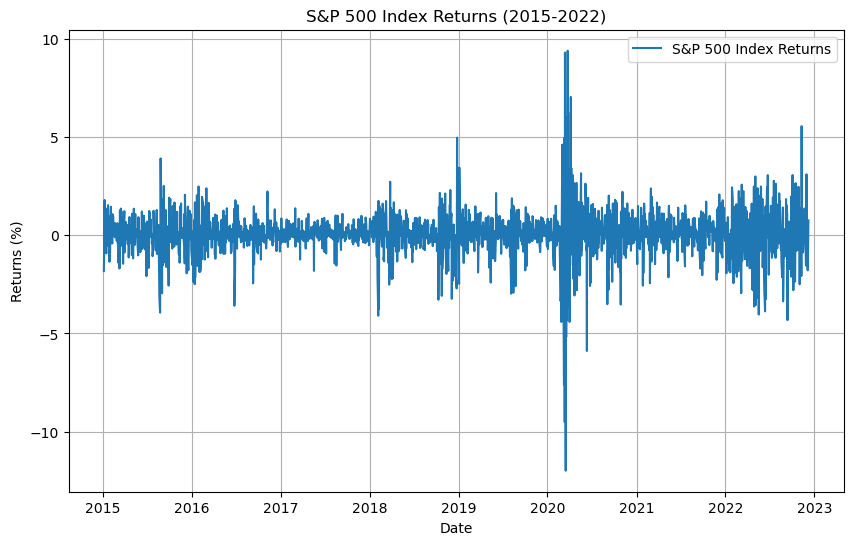

In [41]:
import yfinance as yf
import matplotlib.pyplot as plt

# Define the ticker symbol for the S&P 500 index
ticker_symbol = "^GSPC"

# Define the start and end dates
start_date = trading_day_list_str[0]
end_date = trading_day_list_str[-1]

# Fetch the historical data from Yahoo Finance
data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Plot the closing price
# Calculate daily returns
data['Returns'] = data['Close'].pct_change() * 100  # Multiply by 100 to get percentage change

# Plot the returns
plt.figure(figsize=(10, 6))
plt.plot(data['Returns'], label='S&P 500 Index Returns')
plt.title('S&P 500 Index Returns (2015-2022)')
plt.xlabel('Date')
plt.ylabel('Returns (%)')
plt.legend()
plt.grid(True)
plt.show()

[*********************100%%**********************]  1 of 1 completed

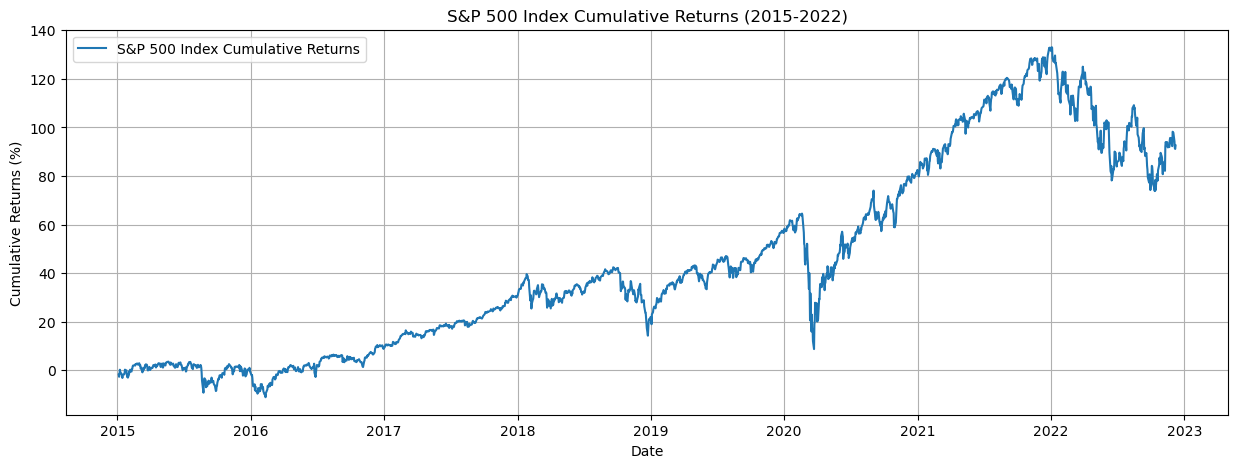

In [42]:
# Fetch the historical data from Yahoo Finance
data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Calculate daily returns
data['Returns'] = data['Close'].pct_change()

# Calculate cumulative returns
data['Cumulative Returns'] = (1 + data['Returns']).cumprod() - 1

# Plot the cumulative returns
plt.figure(figsize=(15,5))
plt.plot(data['Cumulative Returns'] * 100, label='S&P 500 Index Cumulative Returns')
plt.title('S&P 500 Index Cumulative Returns (2015-2022)')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns (%)')
plt.legend()
plt.grid(True)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


lendates 2072
len cumreturns 1991


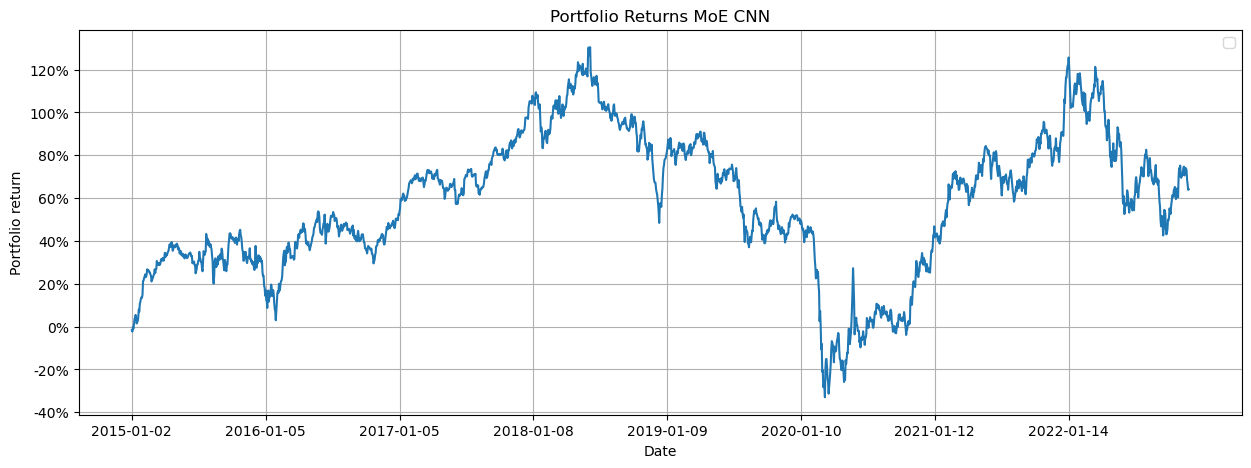

<Figure size 640x480 with 0 Axes>

In [44]:
from matplotlib.ticker import FuncFormatter

testDataStart = "2015-01-02"
testDataEnd = "2022-12-12"

# total growth

dates = pd.date_range(start=testDataStart, end=testDataEnd, freq='B')  # Business days frequency
def to_percent(y, _):
    return '{:.0f}%'.format(y * 100)

formatter = FuncFormatter(to_percent)

cumReturns = np.cumprod([dr+1 for dr in dailyReturns]) -1
print(f"lendates {len(dates)}")
print(f"len cumreturns {len(cumReturns)}")
plt.figure(figsize=(15, 5))
plt.plot(trading_day_list_str, cumReturns, linestyle='-')
plt.title("Portfolio Returns MoE CNN")
plt.ylabel("Portfolio return")
plt.xlabel("Date")
plt.xticks(trading_day_list_str[::252])
plt.gca().yaxis.set_major_formatter(formatter)
plt.legend()
plt.grid(True)
plt.show()
plt.savefig("cumReturns.png")

[*********************100%%**********************]  1 of 1 completed

KeyError: "['2015-04-03', '2016-03-25', '2017-04-14', '2018-03-30', '2018-12-05', '2019-04-19', '2020-04-10', '2021-04-02', '2022-01-03', '2022-01-04', '2022-01-05', '2022-01-06', '2022-01-07', '2022-01-10', '2022-01-11', '2022-01-12', '2022-01-13', '2022-01-14', '2022-01-18', '2022-01-19', '2022-01-20', '2022-01-21', '2022-01-24', '2022-01-25', '2022-01-26', '2022-01-27', '2022-01-28', '2022-01-31', '2022-02-01', '2022-02-02', '2022-02-03', '2022-02-04', '2022-02-07', '2022-02-08', '2022-02-09', '2022-02-10', '2022-02-11', '2022-02-14', '2022-02-15', '2022-02-16', '2022-02-17', '2022-02-18', '2022-02-22', '2022-02-23', '2022-02-24', '2022-02-25', '2022-02-28', '2022-03-01', '2022-03-02', '2022-03-03', '2022-03-04', '2022-03-07', '2022-03-08', '2022-03-09', '2022-03-10', '2022-03-11', '2022-03-14', '2022-03-15', '2022-03-16', '2022-03-17', '2022-03-18', '2022-03-21', '2022-03-22', '2022-03-23', '2022-03-24', '2022-03-25', '2022-03-28', '2022-03-29', '2022-03-30', '2022-03-31', '2022-04-01', '2022-04-04', '2022-04-05', '2022-04-06', '2022-04-07', '2022-04-08', '2022-04-11', '2022-04-12', '2022-04-13', '2022-04-14', '2022-04-15', '2022-04-18', '2022-04-19', '2022-04-20', '2022-04-21', '2022-04-22', '2022-04-25', '2022-04-26', '2022-04-27', '2022-04-28', '2022-04-29', '2022-05-02', '2022-05-03', '2022-05-04', '2022-05-05', '2022-05-06', '2022-05-09', '2022-05-10', '2022-05-11', '2022-05-12', '2022-05-13', '2022-05-16', '2022-05-17', '2022-05-18', '2022-05-19', '2022-05-20', '2022-05-23', '2022-05-24', '2022-05-25', '2022-05-26', '2022-05-27', '2022-05-31', '2022-06-01', '2022-06-02', '2022-06-03', '2022-06-06', '2022-06-07', '2022-06-08', '2022-06-09', '2022-06-10', '2022-06-13', '2022-06-14', '2022-06-15', '2022-06-16', '2022-06-17', '2022-06-21', '2022-06-22', '2022-06-23', '2022-06-24', '2022-06-27', '2022-06-28', '2022-06-29', '2022-06-30', '2022-07-01', '2022-07-05', '2022-07-06', '2022-07-07', '2022-07-08', '2022-07-11', '2022-07-12', '2022-07-13', '2022-07-14', '2022-07-15', '2022-07-18', '2022-07-19', '2022-07-20', '2022-07-21', '2022-07-22', '2022-07-25', '2022-07-26', '2022-07-27', '2022-07-28', '2022-07-29', '2022-08-01', '2022-08-02', '2022-08-03', '2022-08-04', '2022-08-05', '2022-08-08', '2022-08-09', '2022-08-10', '2022-08-11', '2022-08-12', '2022-08-15', '2022-08-16', '2022-08-17', '2022-08-18', '2022-08-19', '2022-08-22', '2022-08-23', '2022-08-24', '2022-08-25', '2022-08-26', '2022-08-29', '2022-08-30', '2022-08-31', '2022-09-01', '2022-09-02', '2022-09-06', '2022-09-07', '2022-09-08', '2022-09-09', '2022-09-12', '2022-09-13', '2022-09-14', '2022-09-15', '2022-09-16', '2022-09-19', '2022-09-20', '2022-09-21', '2022-09-22', '2022-09-23', '2022-09-26', '2022-09-27', '2022-09-28', '2022-09-29', '2022-09-30', '2022-10-03', '2022-10-04', '2022-10-05', '2022-10-06', '2022-10-07', '2022-10-11', '2022-10-12', '2022-10-13', '2022-10-14', '2022-10-17', '2022-10-18', '2022-10-19', '2022-10-20', '2022-10-21', '2022-10-24', '2022-10-25', '2022-10-26', '2022-10-27', '2022-10-28', '2022-10-31', '2022-11-01', '2022-11-02', '2022-11-03', '2022-11-04', '2022-11-07', '2022-11-08', '2022-11-09', '2022-11-10', '2022-11-14', '2022-11-15', '2022-11-16', '2022-11-17', '2022-11-18', '2022-11-21', '2022-11-22', '2022-11-23', '2022-11-25', '2022-11-28', '2022-11-29', '2022-11-30', '2022-12-01', '2022-12-02', '2022-12-05', '2022-12-06', '2022-12-07', '2022-12-08', '2022-12-09'] not in index"

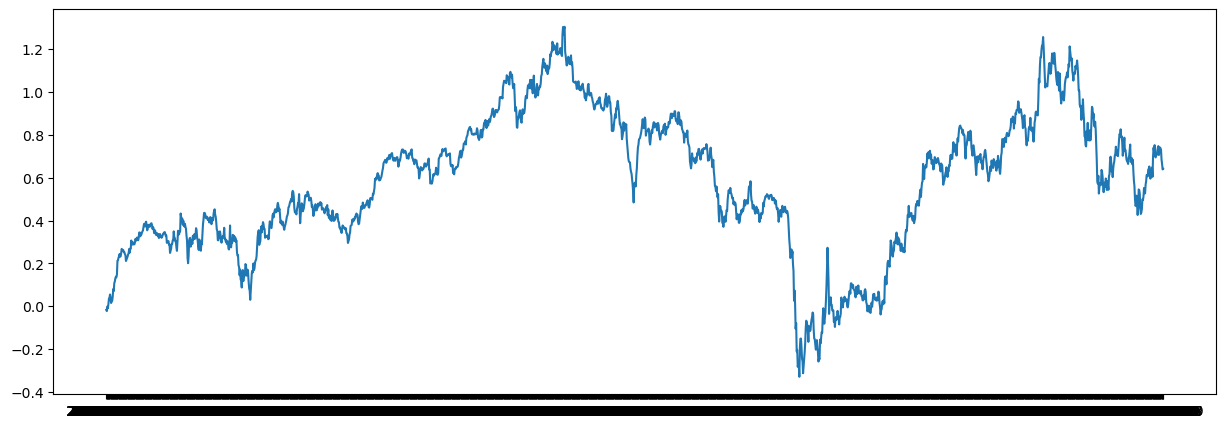

In [53]:
# Fetch the historical data from Yahoo Finance
data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Calculate daily returns
data['Returns'] = data['Close'].pct_change()

# Calculate cumulative returns
data['Cumulative Returns'] = (1 + data['Returns']).cumprod() - 1

# # Plot the cumulative returns
# plt.figure(figsize=(15,5))
# plt.plot(data['Cumulative Returns'] * 100, label='S&P 500 Index Cumulative Returns')


from matplotlib.ticker import FuncFormatter

testDataStart = "2015-01-02"
testDataEnd = "2022-12-12"

# total growth

dates = pd.date_range(start=testDataStart, end=testDataEnd, freq='B')  # Business days frequency

def to_percent(y, _):
    return '{:.0f}%'.format(y * 100)

formatter = FuncFormatter(to_percent)

cumReturns = np.cumprod([dr+1 for dr in dailyReturns]) -1
# print(f"lendates {len(dates)}")
# print(f"len cumreturns {len(cumReturns)}")
# plt.figure(figsize=(15, 5))
# plt.plot(trading_day_list_str, cumReturns, linestyle='-', label="Moe")



# plt.title("Portfolio Returns MoE CNN")
# plt.ylabel("Portfolio return")
# plt.xlabel("Date")
# plt.xticks(trading_day_list_str[::252])
# plt.gca().yaxis.set_major_formatter(formatter)
# plt.legend()
# plt.grid(True)
# plt.show()
# plt.savefig("cumReturns.png")





# Plot both indices on the same graph
plt.figure(figsize=(15, 5))

# Plot the first index
plt.plot(trading_day_list_str, cumReturns, label='MoE')

# Plot the second index
plt.plot(trading_day_list_str, data.loc[trading_day_list_str]['Cumulative Returns'], label='Snp500 Index', color='orange')

# Add title and labels
plt.title('Index Comparison (2015-2022)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


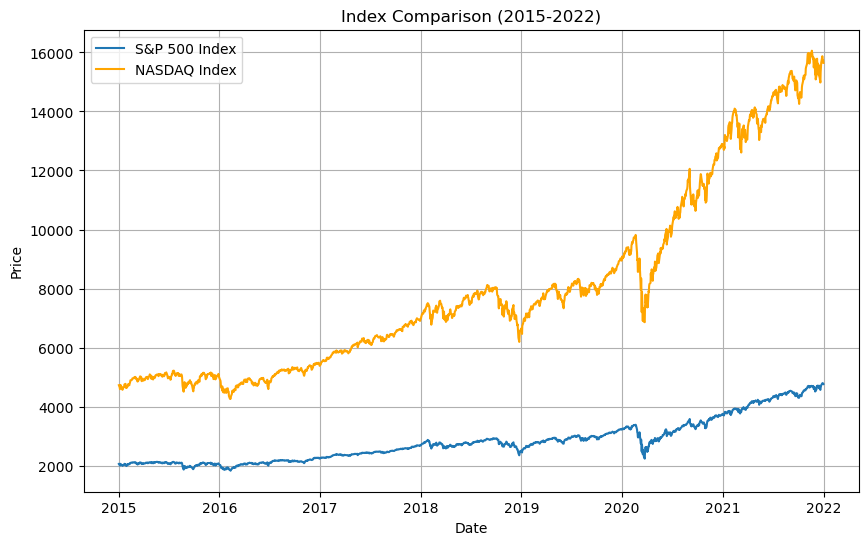

In [46]:
import yfinance as yf
import matplotlib.pyplot as plt

# Define the ticker symbols for the indices
ticker_symbol1 = "^GSPC"  # S&P 500 index
ticker_symbol2 = "^IXIC"  # NASDAQ index (example)

# Define the start and end dates
start_date = "2015-01-01"
end_date = "2022-01-01"

# Fetch the historical data from Yahoo Finance for both indices
data1 = yf.download(ticker_symbol1, start=start_date, end=end_date)
data2 = yf.download(ticker_symbol2, start=start_date, end=end_date)

# Plot both indices on the same graph
plt.figure(figsize=(10, 6))

# Plot the first index
plt.plot(data1['Close'], label='S&P 500 Index')

# Plot the second index
plt.plot(data2['Close'], label='NASDAQ Index', color='orange')

# Add title and labels
plt.title('Index Comparison (2015-2022)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()
